# Collate Dataset

Each image has a name "Day_Temperature_Tank_CoralNumber.jpg"
Which maps to a row in the CSV

In [43]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import shutil

In [7]:
labelCSV = pd.read_csv("BleachingScoresJuly2018.csv")

In [8]:
labelCSV

,Tank_Number,Cycle_Number,Collected,Reef,Temperature,Ramp_Started_Day_1,Colony_Number,Day,Score,Scorer_1,Scorer_2,Scorer_3,Notes,Notes2
0,1,6,7/19/18,40,30.0,NaN,281,0,N,KCH,NSW,NaN,NaN,NaN
1,1,6,7/19/18,40,30.0,NaN,281,1,N,KCH,NSW,NaN,NaN,NaN
2,1,6,7/19/18,40,30.0,NaN,281,2,N,KCH,NSW,BHC,NaN,NaN
3,2,6,7/19/18,40,30.0,NaN,281,0,N,KCH,NSW,NaN,NaN,NaN
4,2,6,7/19/18,40,30.0,NaN,281,1,V,KCH,BHC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530,9,12,8/11/18,27,34.5,NaN,160,1,V,BHC,NaN,NaN,NaN,NaN
5531,9,12,8/11/18,27,34.5,NaN,160,2,V,BHC,NaN,NaN,NaN,NaN
5532,10,12,8/11/18,27,35.0,NaN,160,0,V,CAH,NSW,NaN,NaN,NaN
5533,10,12,8/11/18,27,35.0,NaN,160,1,S,BHC,NaN,NaN,NaN,NaN


In [65]:
def getLabel(filename):
    root = filename[:-4]
    day, temperature, tank, coralNum = root.split("_")
    day = int(day)
    temperature = float(temperature)
    tank = int(tank)
    coralNum = int(coralNum)
    
    temp = labelCSV[labelCSV.Day == (day - 1)]
    temp = temp[temp.Temperature == temperature]
    temp = temp[temp.Tank_Number == tank]
    temp = temp[temp.Colony_Number == coralNum]
        
    if temp.shape[0] > 1:
        raise "AHHHHHH more than one record for this image"
    
    return str(temp.iloc[0].Score)

In [2]:
s = "hello.jpg"
s[:-4]

'hello'

In [29]:
s = "1_34_8_378.jpg"
getLabel(s)

'V'

In [30]:
dataDir = "../CleanData"

In [38]:
labels = []
for root, dirs, files in os.walk(dataDir):
    for name in files:
        
        filename = os.path.join(root, name)
        try:
            label = getLabel(name)
        except Exception as e:
            print(filename, e)
            continue
        print(filename, label)
        labels.append(label)

../CleanData/0370_Tank3_34/1_34_3_353.JPG V
../CleanData/0370_Tank3_34/1_34_3_375.JPG N
../CleanData/0370_Tank3_34/1_34_3_381.JPG V
../CleanData/0370_Tank3_34/1_34_3_395.JPG V
../CleanData/0370_Tank3_34/.DS_Store not enough values to unpack (expected 4, got 2)
../CleanData/0370_Tank3_34/1_34_3_384.JPG N
../CleanData/0370_Tank3_34/1_34_3_382.JPG N
../CleanData/0370_Tank3_34/1_34_3_231.JPG N
../CleanData/0370_Tank3_34/1_34_3_394.JPG N
../CleanData/0370_Tank3_34/1_34_3_372.JPG N
../CleanData/0370_Tank3_34/1_34_3_373.JPG N
../CleanData/0370_Tank3_34/DSCF0370.JPG not enough values to unpack (expected 4, got 1)
../CleanData/0370_Tank3_34/1_34_3_383.JPG N
../CleanData/0370_Tank3_34/1_34_3_374.JPG N
../CleanData/0370_Tank3_34/1_34_3_352.JPG N
../CleanData/0370_Tank3_34/1_34_3_392.JPG N
../CleanData/0370_Tank3_34/1_34_3_235.JPG V
../CleanData/0370_Tank3_34/1_34_3_233.JPG N
../CleanData/0370_Tank3_34/1_34_3_234.JPG N
../CleanData/0370_Tank3_34/1_34_3_393.JPG V
../CleanData/0370_Tank3_34/1_34_3_2

Counter({'N': 157, 'V': 85, 'M': 1}) dict_keys(['V', 'N', 'M'])


<BarContainer object of 3 artists>

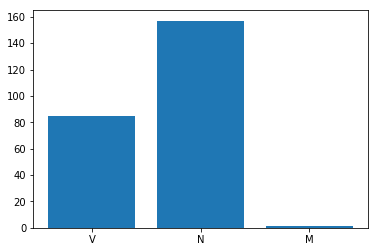

In [42]:
from collections import Counter
counts = Counter(labels)
print(counts, counts.keys())
plt.bar(list(counts.keys()), list(counts.values()))

In [68]:
#Split the dataset
if os.path.exists("../dataset"):
    shutil.rmtree("../dataset")
os.mkdir("../dataset")
os.mkdir("../dataset/train")
os.mkdir("../dataset/train/V")
os.mkdir("../dataset/train/N")
os.mkdir("../dataset/test")
os.mkdir("../dataset/test/V")
os.mkdir("../dataset/test/N")

numFiles = len(labels)
order = np.random.permutation(numFiles)
train_split = 0.8
print(order)
print("We have ", numFiles, " images, which will be split ", train_split, " into train.")

train_idxs = set(order[:int(train_split*numFiles)])

img_idx = 0
for root, dirs, files in os.walk(dataDir):
    for name in files:
        
        #Make sure file is valid
        filename = os.path.join(root, name)
        try:
            label = getLabel(name)
        except Exception as e:
            continue
            
        print(label)
        if not (label == "V" or label == "N"):
            continue
            
        #Move it into train or test
        target_filename = "../dataset/{}/{}/".format("train" if img_idx in train_idxs else "test", label)
        print(target_filename)
        shutil.copy(filename, target_filename)
        
        img_idx += 1

[ 27  21  90  35  20  51  38  70  98  63 101  25 212  89 124  17 126 181
  22 239 240  16 153 143 178  91 111 169 134 182 220 205 151  53  43 234
 190  64 199 117 138 125 194 131 223  42 115  79  84 195  48 179 145   7
 166 118 184  85  28 147  80 119  72 232 202 171  19 158 196 154   6 177
 214  45 224 206 188 218 100  49 231  76  56 225  95 216 209 156 204 121
  73  83 228 233 217  71 129   9 165 120 173   5 114 203   1  55 167  30
  12 107   8  99  86 213 106 229 109 189  14 235 144   4 159  57  47   3
 105  66  29  50  52 207  88 122 192 150  39 186 201 230 160  77  75 130
 191  94 140  41  78 211  11  82 193  54 241   2 108 168  46 185 183  10
  58  65 198 187 128  68 222  59 104 210 174  15 116  34 219 221  31 180
  36 137  18 236  40 148  13 242 149 123 110  61 113 162  37 136 226  23
  81  92 157  32  67 176  74   0 142 139  26 161 208 227 175 237  93  24
 112 146 152 102 197 238 155 133  60  44  97 164  33 103 200 170 172 163
 127  87 135 132 141 215  96  62  69]
We have  243 